# Problem 2: 
## [ATM350 Homework 3](https://docs.google.com/document/d/1LakRQQE3ORtRqUrKRTJa7IZy93uLa2qe37AUMpY0v68/edit), Spring 2023
```
Create a notebook, q2.ipynb that analyzes and visualizes Albany climate data from 2022, using the same file used in class during the Pandas lectures.
```

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = '/spare11/atm350/common/data/climo_alb_2022.csv'

#### Read in the file. Specify that each column's values should be read in as strings.

In [3]:
df = pd.read_csv(file, dtype='string') 

Examine the `Dataframe`

In [4]:
df 

DATE MAX MIN   AVG   DEP HDD CDD   PCP  SNW DPT
0    2022-01-01  51  41  46.0  19.7  19   0  0.12  0.0   0
1    2022-01-02  49  23  36.0   9.9  29   0  0.07  0.2   0
2    2022-01-03  23  13  18.0  -7.9  47   0     T    T   T
3    2022-01-04  29  10  19.5  -6.2  45   0     T  0.1   T
4    2022-01-05  38  28  33.0   7.5  32   0  0.00  0.0   T
..          ...  ..  ..   ...   ...  ..  ..   ...  ...  ..
360  2022-12-27  34  22  28.0   0.6  37   0  0.00  0.0   T
361  2022-12-28  41  22  31.5   4.3  33   0  0.00  0.0   T
362  2022-12-29  48  22  35.0   8.1  30   0  0.00  0.0   T
363  2022-12-30  57  43  50.0  23.3  15   0  0.00  0.0   0
364  2022-12-31  53  44  48.5  22.0  16   0  0.08  0.0   0

[365 rows x 10 columns]

### Part a: 
```
After reading in minimum and maximum daily temperature, create a new object defined as the daily temperature difference, or diurnal range.  Include a cell that prints out the maximum diurnal range, minimum diurnal range, and mean diurnal range for the year 2022. 
```


In [5]:
maxT = df['MAX'].astype("float32")
minT = df['MIN'].astype("float32")
diRange = maxT - minT                        

Examine the diurnal range `series`

In [6]:
diRange

0      10.0
1      26.0
2      10.0
3      19.0
4      10.0
       ... 
360    12.0
361    19.0
362    26.0
363    14.0
364     9.0
Length: 365, dtype: float32

Compute and output the maximum/minimum single daily values of diurnal temperature range, and also the mean over the year.

In [7]:
diMax = diRange.max()
diMin = diRange.min()
diMean = diRange.mean()
diMax, diMin, diMean

(44.0, 2.0, 20.424657821655273)

In [8]:
print(f'ALB 2022: Greatest, least, and average diurnal temperature range: {diMax}, {diMin}, {diMean:.1f}  °F' )

ALB 2022: Greatest, least, and average diurnal temperature range: 44.0, 2.0, 20.4  °F


### Part b: 
```
On one figure, plot the daily diurnal range over the entire year.  Save this figure to your hw3 directory as albDiurnalRange2022.png.
```


#### Import Matplotlib functions designed for time-series plots

In [9]:
from matplotlib.dates import DateFormatter, AutoDateLocator,HourLocator,DayLocator,MonthLocator

Create an object for the DATE column, and then express it as type `Datetime`.

In [10]:
date = df['DATE']
date = pd.to_datetime(date, format="%Y-%m-%d")

#### Create the figure

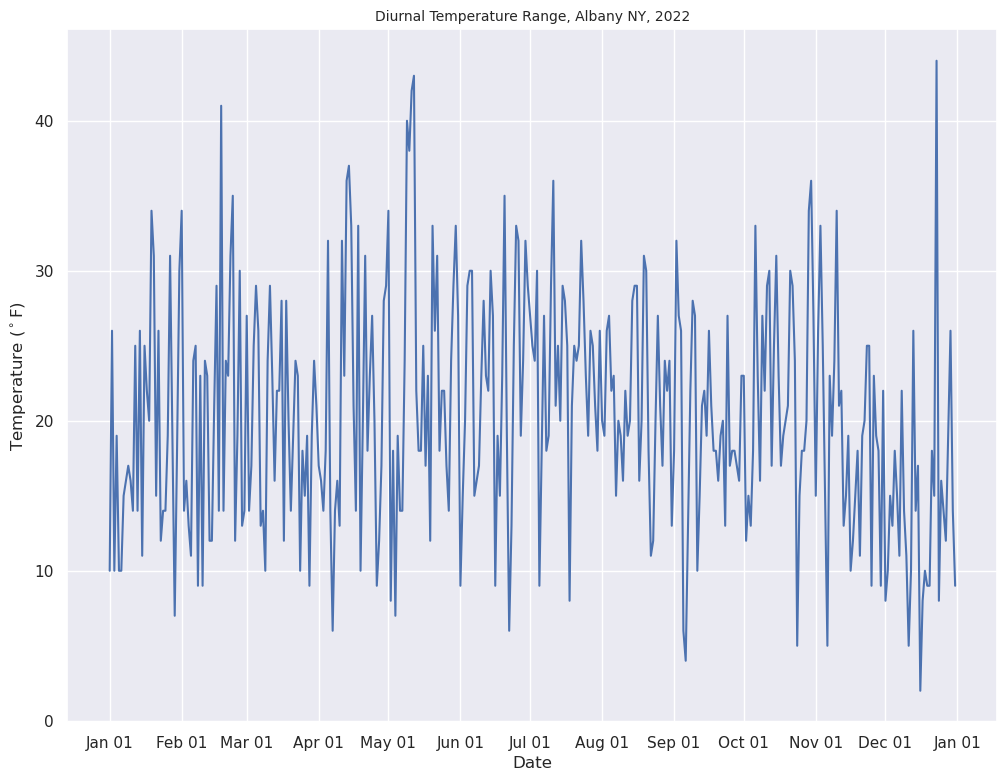

In [11]:
sns.set()
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot() # Default is one axes per figure

ax.plot(date, diRange)

ax.xaxis.set_major_locator(MonthLocator(interval=1))
dateFmt = DateFormatter('%b %d')
ax.xaxis.set_major_formatter(dateFmt)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature ($^\circ$F)')
ax.set_title('Diurnal Temperature Range, Albany NY, 2022',fontsize=10);

#### Save the figure to your current directory.

In [12]:
fig.savefig('albDiurnalRange2022.png')

### Part c: 
```
On a separate figure, plot the 15-day and 60-day rolling means of diurnal range, named albDiurnalRange2022_15d.png and albDiurnalRange2022_60d.png, respectively.
```


#### Compute the 15- and 60-day rolling means

In [13]:
diRange15 = diRange.rolling(window=15, center=True)
diRange60 = diRange.rolling(window=60, center=True)
diRange15Mean = diRange15.mean()
diRange60Mean = diRange60.mean()

#### Plot the 15-day rolling mean

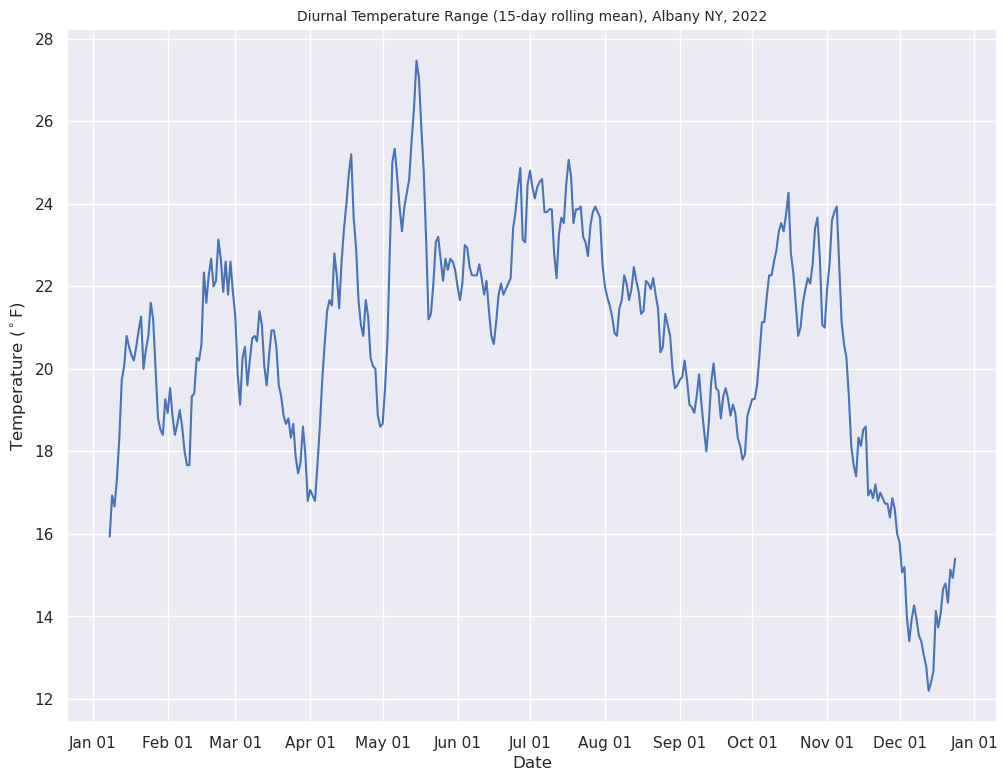

In [14]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot()

ax.plot(date, diRange15Mean)

ax.xaxis.set_major_locator(MonthLocator(interval=1))
dateFmt = DateFormatter('%b %d')
ax.xaxis.set_major_formatter(dateFmt)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature ($^\circ$F)')
ax.set_title('Diurnal Temperature Range (15-day rolling mean), Albany NY, 2022',fontsize=10);

#### Save the figure to your current directory.

In [15]:
fig.savefig('albDiurnalRange2022_15d.png')

#### Plot the 60-day rolling mean

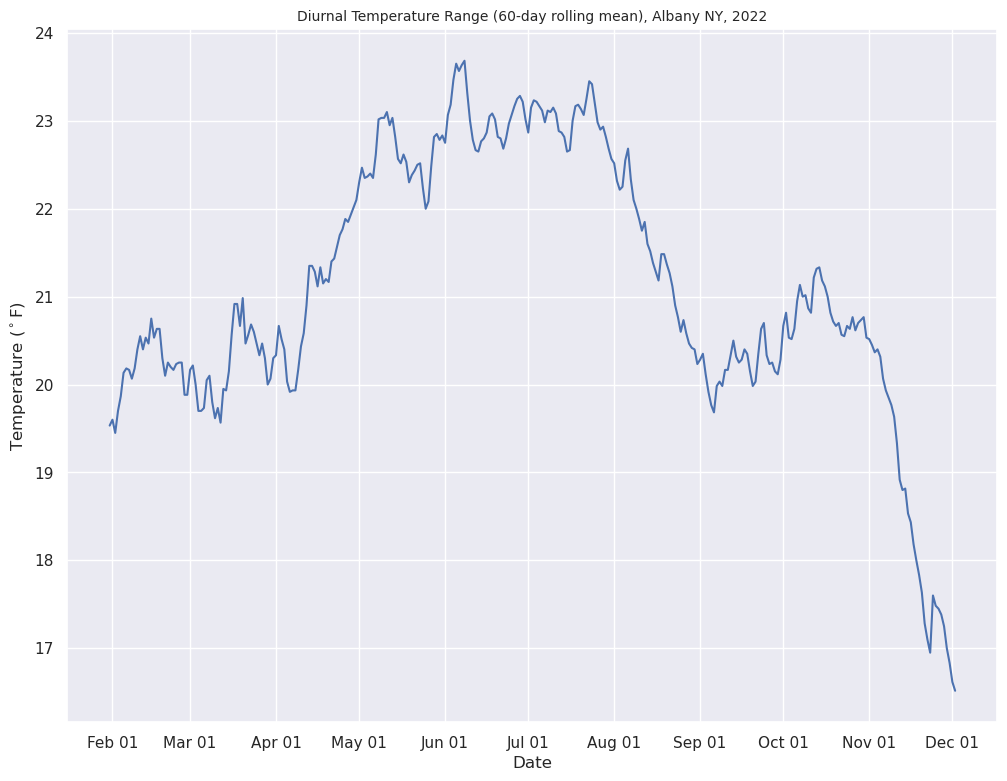

In [16]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot()

ax.plot(date, diRange60Mean)

ax.xaxis.set_major_locator(MonthLocator(interval=1))
dateFmt = DateFormatter('%b %d')
ax.xaxis.set_major_formatter(dateFmt)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature ($^\circ$F)')
ax.set_title('Diurnal Temperature Range (60-day rolling mean), Albany NY, 2022',fontsize=10);

#### Save the figure to your current directory.

In [17]:
fig.savefig('albDiurnalRange2022_60d.png')

### Part d: 
```
Read in the daily snowfall. Then, plot the daily total of snowfall (not the cumulative sum) over the year on a final figure.  Save this figure to your hw3 directory as albDailySnow2022.png.

```

#### Read in the daily snowfall total

In [18]:
snow = df['SNW']

Find those days where a trace of snow fell

Set all values of 'T' to '0.00', and recast the series as floating point values.

In [20]:
df.loc[df['SNW'] =='T', ['SNW']] = '0.0'

In [21]:
df['SNW'] = df['SNW'].astype("float32")

Redefine the `snow` object, now that its values are floating points, with T set to 0.0

In [22]:
snow = df['SNW']

#### Create the figure

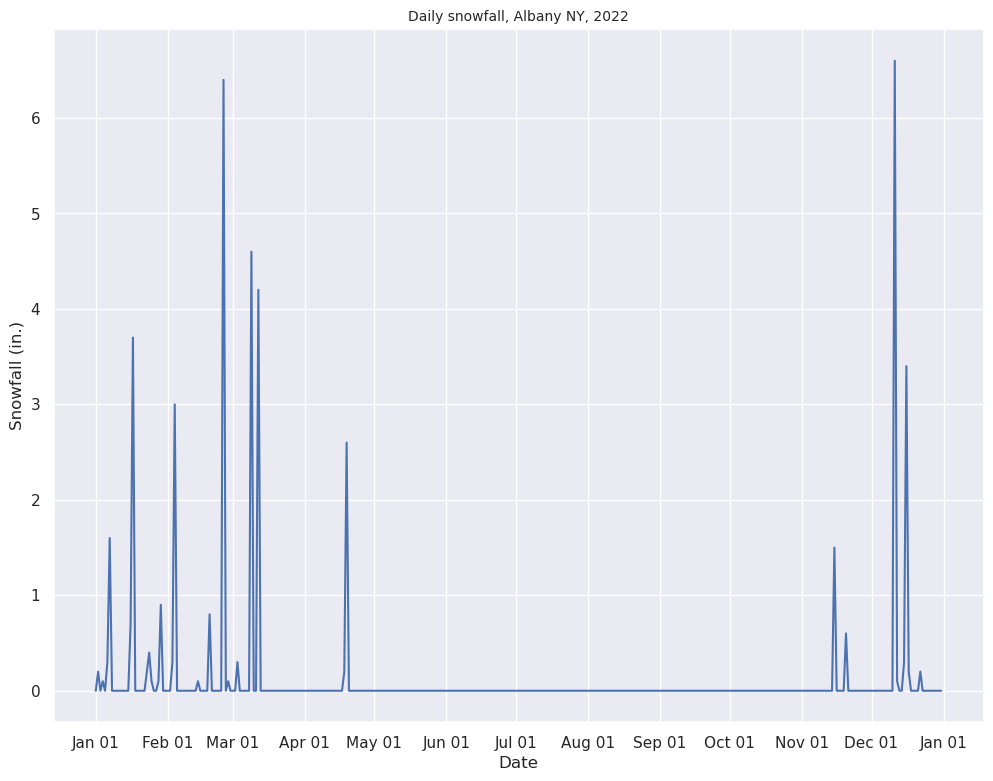

In [23]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot()

ax.plot(date, snow)

ax.xaxis.set_major_locator(MonthLocator(interval=1))
dateFmt = DateFormatter('%b %d')
ax.xaxis.set_major_formatter(dateFmt)
ax.set_xlabel('Date')
ax.set_ylabel('Snowfall (in.)')
ax.set_title('Daily snowfall, Albany NY, 2022',fontsize=10);

#### Save the figure to your current directory.

In [24]:
fig.savefig('albDailySnow2022.png')